### Problem Statement:

A new football club named ‘Brussels United FC’ has just been inaugurated. This club does not have a team yet. The team is looking to hire players for their roster. Management wants to make such decisions using data based approach. During a recent hiring drive, you were selected for the Data Science team as a Junior data scientist. Your team has been tasked with creating a report which recommends players for the main team. To start with, a total 15 players are required. Player data for all teams has been acquired from FIFA. This data contains information about the palyers, the clubs they are currently playing for and various performance measures.
There is a limited budget for hiring players. The team needs 20 possible players to choose from. You have been requested to formulate a report in order to help the management make a decision regarding potential players.

Data:
The data contains details for over 18,000 players playing in various football clubs in Europe. It contains information on age, skill rating, wages and player value, etc. The files provided are as folows: 
fifa.csv – data file.
fifa_ variable_information.csv - information on individual variables.





## Data Preprocessing:



### 1.	Import the necessary libraries and read the data.


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df=pd.read_csv('fifa.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,244274,A. Šemper,20,https://cdn.sofifa.org/players/4/19/244274.png,Croatia,https://cdn.sofifa.org/flags/10.png,67,80,Chievo Verona,https://cdn.sofifa.org/teams/2/light/192.png,...,21.0,13.0,12.0,15.0,71.0,63.0,61.0,68.0,65.0,€2.8M
1,231786,A. Šporar,24,https://cdn.sofifa.org/players/4/19/231786.png,Slovenia,https://cdn.sofifa.org/flags/44.png,69,76,NaN,https://cdn.sofifa.org/flags/44.png,...,68.0,15.0,11.0,18.0,9.0,12.0,7.0,8.0,7.0,NaN
2,186508,A. Østbø,27,https://cdn.sofifa.org/players/4/19/186508.png,Norway,https://cdn.sofifa.org/flags/36.png,65,69,Rosenborg BK,https://cdn.sofifa.org/teams/2/light/298.png,...,46.0,23.0,14.0,10.0,63.0,64.0,62.0,61.0,67.0,€653K
3,246257,A. Ćatić,19,https://cdn.sofifa.org/players/4/19/246257.png,Bosnia Herzegovina,https://cdn.sofifa.org/flags/8.png,60,75,PSV,https://cdn.sofifa.org/teams/2/light/247.png,...,52.0,28.0,29.0,30.0,7.0,8.0,7.0,13.0,12.0,€911K
4,229594,A. Ćorić,21,https://cdn.sofifa.org/players/4/19/229594.png,Croatia,https://cdn.sofifa.org/flags/10.png,76,88,Roma,https://cdn.sofifa.org/teams/2/light/52.png,...,78.0,44.0,31.0,24.0,15.0,10.0,14.0,14.0,7.0,€26.6M


In [31]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [32]:
df_col=pd.read_csv('fifa_ variable_information.csv')

In [33]:
df_col

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag
5,Overall,overall rating
6,Potential,potential rating
7,Club,current club
8,Club Logo,url to club logo
9,Value,current market value


### 2.	Drop any columns that you deem unecessary for analysis.


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [35]:
round((df.isnull().sum()/len(df))*100,2)

ID                           0.00
Name                         0.00
Age                          0.00
Photo                        0.00
Nationality                  0.00
Flag                         0.00
Overall                      0.00
Potential                    0.00
Club                         1.32
Club Logo                    0.00
Value                        0.00
Wage                         0.00
Preferred Foot               0.26
International Reputation     0.26
Weak Foot                    0.26
Skill Moves                  0.26
Work Rate                    0.26
Body Type                    0.26
Position                     0.33
Jersey Number                0.33
Joined                       8.53
Loaned From                 93.06
Contract Valid Until         1.59
Height                       0.26
Weight                       0.26
Crossing                     0.26
Finishing                    0.26
HeadingAccuracy              0.26
ShortPassing                 0.26
Volleys       

Loaned From has 93% missing values, so we can drop that column 

Also,we can drop photo,flag and club logo as they are urls and have nothing to do with analysis

In [36]:
df=df.drop(['Photo','Flag','Club Logo','Loaned From'],axis=1)


In [37]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,244274,A. Šemper,20,Croatia,67,80,Chievo Verona,€1.2M,€3K,Right,...,21.0,13.0,12.0,15.0,71.0,63.0,61.0,68.0,65.0,€2.8M
1,231786,A. Šporar,24,Slovenia,69,76,NaN,€0,€0,Right,...,68.0,15.0,11.0,18.0,9.0,12.0,7.0,8.0,7.0,NaN
2,186508,A. Østbø,27,Norway,65,69,Rosenborg BK,€475K,€2K,Right,...,46.0,23.0,14.0,10.0,63.0,64.0,62.0,61.0,67.0,€653K
3,246257,A. Ćatić,19,Bosnia Herzegovina,60,75,PSV,€450K,€1K,Right,...,52.0,28.0,29.0,30.0,7.0,8.0,7.0,13.0,12.0,€911K
4,229594,A. Ćorić,21,Croatia,76,88,Roma,€14M,€38K,Right,...,78.0,44.0,31.0,24.0,15.0,10.0,14.0,14.0,7.0,€26.6M


In [38]:
df['Value']

0         €1.2M 
1            €0 
2         €475K 
3         €450K 
4          €14M 
          ...   
18202      €50K 
18203     €650K 
18204       €8M 
18205     €850K 
18206     €120K 
Name: Value, Length: 18207, dtype: object

In [43]:
df['Value']=df['Value'].str.replace('€','')

In [44]:
df['Value']

0         1.2M 
1            0 
2         475K 
3         450K 
4          14M 
          ...  
18202      50K 
18203     650K 
18204       8M 
18205     850K 
18206     120K 
Name: Value, Length: 18207, dtype: object

In [55]:
df['Value']=df.Value.replace({'K':'*1e3','M':'*1e6'},regex=True).map(pd.eval).astype(int)

In [56]:
df['Value']

0         1200000
1               0
2          475000
3          450000
4        14000000
           ...   
18202       50000
18203      650000
18204     8000000
18205      850000
18206      120000
Name: Value, Length: 18207, dtype: int32

In [57]:
df['Wage']

0         €3K
1          €0
2         €2K
3         €1K
4        €38K
         ... 
18202     €2K
18203     €7K
18204    €17K
18205     €4K
18206     €1K
Name: Wage, Length: 18207, dtype: object

In [59]:
df['Wage']=df['Wage'].str.replace('€','')
df['Wage']=df['Wage'].replace({'K':'*1e3'},regex=True).map(pd.eval).astype(int)

In [60]:
df['Wage']

0         3000
1            0
2         2000
3         1000
4        38000
         ...  
18202     2000
18203     7000
18204    17000
18205     4000
18206     1000
Name: Wage, Length: 18207, dtype: int32

In [58]:
df['Joined']

0         Jul 1, 2016
1                 NaN
2         Jan 9, 2017
3        May 30, 2018
4         Jul 1, 2018
             ...     
18202    Feb 26, 2018
18203    Dec 24, 2014
18204     Jul 1, 2015
18205     Jul 1, 2017
18206     Jan 1, 2016
Name: Joined, Length: 18207, dtype: object

In [61]:
df['Joined']=pd.to_datetime(df['Joined'])

In [62]:
import datetime as dt

In [63]:
df['Joined']=df['Joined'].dt.year

In [64]:
df['Joined']

0        2016.0
1           NaN
2        2017.0
3        2018.0
4        2018.0
          ...  
18202    2018.0
18203    2014.0
18204    2015.0
18205    2017.0
18206    2016.0
Name: Joined, Length: 18207, dtype: float64

In [65]:
df['Contract Valid Until']=pd.to_datetime(df['Contract Valid Until'])

In [66]:
df['Contract Valid Until']

0       2022-01-01
1              NaT
2       2019-01-01
3       2020-01-01
4       2023-01-01
           ...    
18202   2020-01-01
18203   2019-01-01
18204   2024-01-01
18205   2021-01-01
18206   2021-01-01
Name: Contract Valid Until, Length: 18207, dtype: datetime64[ns]

In [67]:
df['Height']=df['Height'].str.replace("'",".")

In [68]:
df['Height']

0         6.4
1         6.1
2         6.0
3        5.10
4         5.9
         ... 
18202    5.10
18203    5.10
18204    5.11
18205     6.2
18206    5.10
Name: Height, Length: 18207, dtype: object

In [69]:
df['Height']=pd.to_numeric(df['Height'],errors='coerce',downcast='float')

In [70]:
df['Height']

0        6.40
1        6.10
2        6.00
3        5.10
4        5.90
         ... 
18202    5.10
18203    5.10
18204    5.11
18205    6.20
18206    5.10
Name: Height, Length: 18207, dtype: float32

In [71]:
df['Weight']=df['Weight'].str.replace('lbs','')

In [72]:
df['Weight']=pd.to_numeric(df['Weight'],errors='coerce',downcast='float')

In [73]:
df['Weight']

0        201.0
1        181.0
2        165.0
3        172.0
4        130.0
         ...  
18202    157.0
18203    154.0
18204    174.0
18205    181.0
18206    152.0
Name: Weight, Length: 18207, dtype: float32

In [85]:
df['Release Clause']

0         2.8M
1          NaN
2         653K
3         911K
4        26.6M
         ...  
18202     118K
18203     1.4M
18204    18.4M
18205       2M
18206     282K
Name: Release Clause, Length: 18207, dtype: object

In [84]:
df['Release Clause']=df['Release Clause'].str.replace('€','')


In [74]:
df['Release Clause']=df['Release Clause'].str.replace('€','')

In [46]:
df['Release Clause']=df['Release Clause'].str.replace('K','000')

In [47]:
df['Release Clause']=df['Release Clause'].str.replace('M','000000')

In [48]:
df['Release Clause']=df['Release Clause'].str.replace('.1000000','100000')

In [49]:
df['Release Clause']=df['Release Clause'].str.replace('.2000000','200000')

In [50]:
df['Release Clause']=df['Release Clause'].str.replace('.3000000','300000')

In [51]:
df['Release Clause']=df['Release Clause'].str.replace('.4000000','400000')

In [52]:
df['Release Clause']=df['Release Clause'].str.replace('.5000000','500000')

In [53]:
df['Release Clause']=df['Release Clause'].str.replace('.6000000','600000')

In [54]:
df['Release Clause']=df['Release Clause'].str.replace('.7000000','700000')

In [55]:
df['Release Clause']=df['Release Clause'].str.replace('.8000000','800000')

In [56]:
df['Release Clause']=df['Release Clause'].str.replace('.9000000','900000')

In [57]:
df['Release Clause']=pd.to_numeric(df['Release Clause'],errors='coerce',downcast='float')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18207 non-null  int64         
 1   Name                      18207 non-null  object        
 2   Age                       18207 non-null  int64         
 3   Nationality               18207 non-null  object        
 4   Overall                   18207 non-null  int64         
 5   Potential                 18207 non-null  int64         
 6   Club                      17966 non-null  object        
 7   Value                     18207 non-null  float64       
 8   Wage                      18207 non-null  float32       
 9   Preferred Foot            18159 non-null  object        
 10  International Reputation  18159 non-null  float64       
 11  Weak Foot                 18159 non-null  float64       
 12  Skill Moves       

### 4.	Check for missing values and do a mean imputation where necessary.

In [59]:
round((df.isnull().sum()/len(df))*100,2)

ID                          0.00
Name                        0.00
Age                         0.00
Nationality                 0.00
Overall                     0.00
Potential                   0.00
Club                        1.32
Value                       0.00
Wage                        0.00
Preferred Foot              0.26
International Reputation    0.26
Weak Foot                   0.26
Skill Moves                 0.26
Work Rate                   0.26
Body Type                   0.26
Position                    0.33
Jersey Number               0.33
Joined                      8.53
Contract Valid Until        1.59
Height                      0.26
Weight                      0.26
Crossing                    0.26
Finishing                   0.26
HeadingAccuracy             0.26
ShortPassing                0.26
Volleys                     0.26
Dribbling                   0.26
Curve                       0.26
FKAccuracy                  0.26
LongPassing                 0.26
BallContro

In [60]:
df['Release Clause']=df['Release Clause'].fillna(df['Release Clause'].mean())

In [61]:
df['Height']=df['Height'].fillna(df['Height'].mean())

In [62]:
df['Weight']=df['Weight'].fillna(df['Weight'].mean())

In [63]:
df['International Reputation']=df['International Reputation'].fillna(df['International Reputation'].mean())

## Exploratory Analysis:


### 1.	Plot the distribution of Overall rating for all players. 


C:\Users\Mohammed Rishab\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


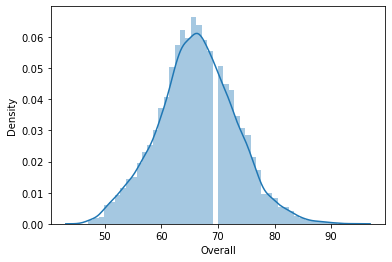

In [203]:
sns.distplot(df['Overall'])
plt.show()

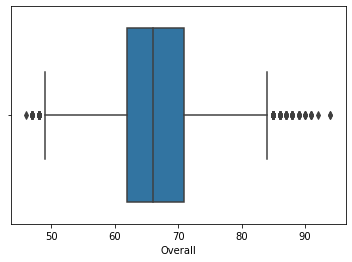

In [65]:
sns.boxplot(x=df['Overall'])
plt.show()

We can observe that median of the overall rating is around 65 and the distribution is more in range 62 - 72

There are some outliers below 50 and above 85

### 2.	Generate pair plots for the following variables: Overall, Value, Wage, International Reputation, Height, Weight, Release Clause


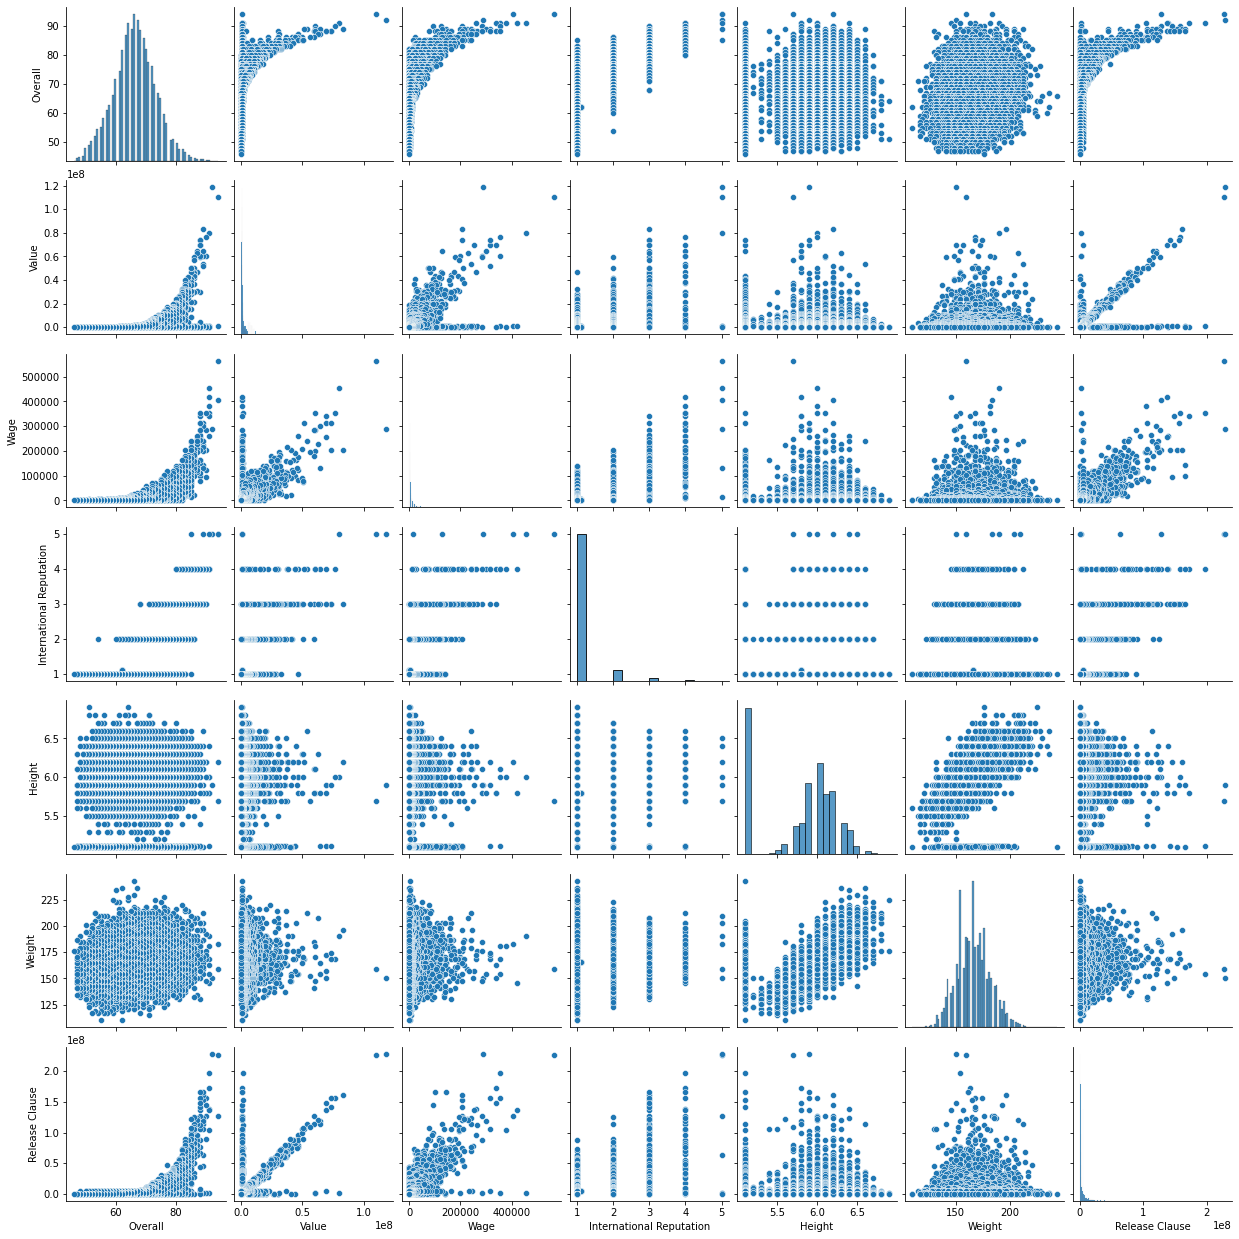

In [66]:
sns.pairplot(data=df,vars=['Overall','Value','Wage','International Reputation','Height','Weight','Release Clause'])
plt.show()

### 3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

a)	What would the average wage for this set of players be?

b)	What is the average age?

c)	Is there a correlation between the Overall rating and Value for these players?



In [67]:
a=df[df['Contract Valid Until'].dt.year==2020]
a

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91,93,Manchester United,200000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,300000.0,340000.0,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,700000.0,420000.0,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,100000.0,380000.0,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
13,168542,David Silva,32,Spain,90,90,Manchester City,60000000.0,285000.0,Left,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,1100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18166,243621,N. Ayéva,16,Sweden,48,72,Örebro SK,70000.0,1000.0,Right,...,44.0,14.0,19.0,16.0,10.0,9.0,8.0,7.0,6.0,158000.0
18179,246243,J. Williams,17,England,48,64,Northampton Town,50000.0,1000.0,Right,...,37.0,42.0,51.0,49.0,14.0,11.0,7.0,11.0,8.0,119000.0
18187,240158,C. Ehlich,19,Germany,47,59,SpVgg Unterhaching,40000.0,1000.0,Right,...,47.0,40.0,42.0,42.0,13.0,12.0,11.0,15.0,12.0,66000.0
18189,240160,A. Kaltner,18,Germany,47,61,SpVgg Unterhaching,60000.0,1000.0,Right,...,37.0,28.0,15.0,22.0,15.0,5.0,14.0,12.0,8.0,125000.0


In [68]:
perform_2020=a.sort_values(by='Overall',ascending=False).iloc[0:20]
perform_2020

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91,93,Manchester United,200000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,700000.0,420000.0,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,100000.0,380000.0,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,300000.0,340000.0,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
13,168542,David Silva,32,Spain,90,90,Manchester City,60000000.0,285000.0,Left,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,1100000.0
21,179813,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,60000000.0,200000.0,Right,...,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,1100000.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,700000.0,215000.0,Left,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0
31,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0
39,164240,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,400000.0,165000.0,Right,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44400000.0
50,175943,D. Mertens,31,Belgium,87,87,Napoli,500000.0,135000.0,Right,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76500000.0


#### a).What would the average wage for this set of players be?

In [69]:
print('The average wage for this set of players is ',perform_2020['Wage'].mean())

The average wage for this set of players is  205450.0


#### b).What is the average age?

In [70]:
print('The average age for this set of players is ',perform_2020['Age'].mean())

The average age for this set of players is  30.65


#### c).Is there a correlation between the Overall rating and Value for these players?

In [71]:
df['Overall'].corr(df['Value'])

0.5545195185275916

There is a moderately good positive correlation between the overall rating and value for these players

### 4.	Generate tables containing the top 5 players by Overall rating for each unique position.
a)	Are there any players appearing in more than one Table. Please point out such players.

b)	What is the average wage one can expect to pay for the top 5 in every position?

In [72]:
df['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [106]:
df['Position'].nunique()

27

In [76]:
RF=df[df['Position']=='RF'].sort_values(by='Overall',ascending=False).nlargest(columns='Overall',n=5)

In [77]:
ST=df[df['Position']=='ST'].sort_values(by='Overall',ascending=False).nlargest(columns='Overall',n=5)

In [79]:
LW=df[df['Position']=='LW'].sort_values(by='Overall',ascending=False).nlargest(columns='Overall',n=5)

In [80]:
GK=df[df['Position']=='GK'].sort_values(by='Overall',ascending=False).nlargest(columns='Overall',n=5)

In [81]:
RCM=df[df['Position']=='RCM'].sort_values(by='Overall',ascending=False).nlargest(columns='Overall',n=5)

In [82]:
LF=df[df['Position']=='LF'].sort_values(by='Overall',ascending=False).nlargest(columns='Overall',n=5)

In [83]:
RS=df[df['Position']=='RS'].sort_values(by='Overall',ascending=False).nlargest(columns='Overall',n=5)

In [84]:
RCB=df[df['Position']=='RCB'].sort_values(by='Overall',ascending=False).nlargest(columns='Overall',n=5)

In [85]:
LCM=df[df['Position']=='LCM'].sort_values(by='Overall',ascending=False).nlargest(columns='Overall',n=5)

In [86]:
CB=df[df['Position']=='CB'].sort_values(by='Overall',ascending=False).nlargest(columns='Overall',n=5)

In [92]:
LCB=df[df['Position']=='LCB'].sort_values(by='Overall',ascending=False).nlargest(columns='Overall',n=5)

In [90]:
CDM=df[df['Position']=='CDM'].sort_values(by='Overall',ascending=False).nlargest(columns='Overall',n=5)

In [89]:
CAM=df[df['Position']=='CAM'].sort_values(by='Overall',ascending=False).nlargest(columns='Overall',n=5)

In [91]:
LS=df[df['Position']=='LS'].sort_values(by='Overall',ascending=False).nlargest(columns='Overall',n=5)

In [93]:
LDM=df[df['Position']=='LDM'].sort_values(by='Overall',ascending=False).nlargest(columns='Overall',n=5)

In [94]:
RM=df[df['Position']=='RM'].sort_values(by='Overall',ascending=False).nlargest(columns='Overall',n=5)

In [95]:
LAM=df[df['Position']=='LAM'].sort_values(by='Overall',ascending=False).nlargest(columns='Overall',n=5)

In [96]:
LM=df[df['Position']=='LM'].sort_values(by='Overall',ascending=False).nlargest(columns='Overall',n=5)

In [97]:
LB=df[df['Position']=='LB'].sort_values(by='Overall',ascending=False).nlargest(columns='Overall',n=5)

In [98]:
RDM=df[df['Position']=='RDM'].sort_values(by='Overall',ascending=False).nlargest(columns='Overall',n=5)

In [99]:
RW=df[df['Position']=='RW'].sort_values(by='Overall',ascending=False).nlargest(columns='Overall',n=5)

In [100]:
CM=df[df['Position']=='CM'].sort_values(by='Overall',ascending=False).nlargest(columns='Overall',n=5)

In [101]:
RB=df[df['Position']=='RB'].sort_values(by='Overall',ascending=False).nlargest(columns='Overall',n=5)

In [102]:
RAM=df[df['Position']=='RAM'].sort_values(by='Overall',ascending=False).nlargest(columns='Overall',n=5)

In [105]:
LWB=df[df['Position']=='LWB'].sort_values(by='Overall',ascending=False).nlargest(columns='Overall',n=5)

In [104]:
RWB=df[df['Position']=='RWB'].sort_values(by='Overall',ascending=False).nlargest(columns='Overall',n=5)

In [103]:
CF=df[df['Position']=='CF'].sort_values(by='Overall',ascending=False).nlargest(columns='Overall',n=5)

In [179]:
l=[RF, ST, LW, GK, RCM, LF, RS, RCB, LCM, CB,
       LDM, CAM, CDM, LS, LCB, RM, LAM, LM, LB, RDM,
       RW, CM, RB, RAM, CF, RWB, LWB]

#### a) Are there any players appearing in more than one Table. Please point out such players.

In [180]:
from itertools import combinations

In [181]:
players=[]
for x,y in combinations(l, 2):
    z=pd.merge(x,y,on='ID')
    players.append(list(z['ID'].values))
       
print(players)

    
    
    
    

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [],

There are no players common in more than one table

#### b) What is the average wage one can expect to pay for the top 5 in every position?

In [140]:
for i in l:
    print('The average wage one can expect to pay for the top 5 in',i['Position'].unique()[0],'position is',i['Wage'].mean())
    

The average wage one can expect to pay for the top 5 in RF position is 148000.0
The average wage one can expect to pay for the top 5 in ST position is 294000.0
The average wage one can expect to pay for the top 5 in LW position is 261000.0
The average wage one can expect to pay for the top 5 in GK position is 192800.0
The average wage one can expect to pay for the top 5 in RCM position is 240800.0
The average wage one can expect to pay for the top 5 in LF position is 121200.0
The average wage one can expect to pay for the top 5 in RS position is 132200.0
The average wage one can expect to pay for the top 5 in RCB position is 231000.0
The average wage one can expect to pay for the top 5 in LCM position is 184400.0
The average wage one can expect to pay for the top 5 in CB position is 139600.0
The average wage one can expect to pay for the top 5 in LDM position is 126600.0
The average wage one can expect to pay for the top 5 in CAM position is 174000.0
The average wage one can expect to 

In [223]:
a={}
for i in l:
    a[i['Position'].unique()[0]]=i['Wage'].mean()
a

{'RF': 148000.0,
 'ST': 294000.0,
 'LW': 261000.0,
 'GK': 192800.0,
 'RCM': 240800.0,
 'LF': 121200.0,
 'RS': 132200.0,
 'RCB': 231000.0,
 'LCM': 184400.0,
 'CB': 139600.0,
 'LDM': 126600.0,
 'CAM': 174000.0,
 'CDM': 217000.0,
 'LS': 130200.0,
 'LCB': 162000.0,
 'RM': 131400.0,
 'LAM': 81600.0,
 'LM': 164600.0,
 'LB': 177200.0,
 'RDM': 105000.0,
 'RW': 202000.0,
 'CM': 130600.0,
 'RB': 155400.0,
 'RAM': 45400.0,
 'CF': 47400.0,
 'RWB': 44200.0,
 'LWB': 34200.0}

In [236]:
d=pd.DataFrame(a,index=['mean']).T
d[d['mean']==d['mean'].max()]

,mean
ST,294000.0


In [235]:
d[d['mean']==d['mean'].min()]

,mean
LWB,34200.0


From above, we can say that the average wage of ST is the maximum and LWB is the least for top 5.